# TSA Explore Exercises

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



### Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
from prepare import *

import warnings
warnings.filterwarnings("ignore")

### Acuire and Prep Data

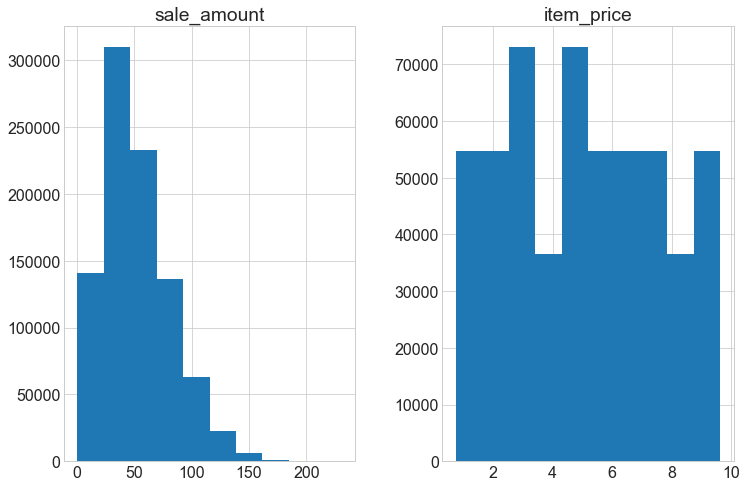

In [3]:
# acquire, clean, and prepare data using clean_items_stores_sales function from prepare.py
items_demand = clean_items_stores_sales()

In [5]:
items_demand.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Tuesday,10.92


In [13]:
items_demand.describe

<bound method NDFrame.describe of                            item  sale_amount  sale_id  store  \
sale_date                                                      
2013-01-01 00:00:00+00:00     1         13.0        1      1   
2013-01-01 00:00:00+00:00    12         26.0   211817      7   
2013-01-01 00:00:00+00:00    46         27.0   832657      7   
2013-01-01 00:00:00+00:00    12         54.0   213643      8   
2013-01-01 00:00:00+00:00    12         35.0   215469      9   
...                         ...          ...      ...    ...   
2017-12-31 00:00:00+00:00    34         21.0   619014      9   
2017-12-31 00:00:00+00:00    34         32.0   620840     10   
2017-12-31 00:00:00+00:00    35         55.0   622666      1   
2017-12-31 00:00:00+00:00    33        100.0   598928      8   
2017-12-31 00:00:00+00:00    50         82.0   913000     10   

                                    store_address   store_city  store_id  \
sale_date                                                

### Data Splitting

Will use human-based splitting for the store item demand data. Will use the last year (2017) of data as the test set, 2016 as validate, and the rest as train. 

In [25]:
# split data into train, validate, test

In [31]:
# python warning said to use `frame.loc[string]`

In [32]:
train = items_demand.loc[:'2015'] # includes 2015
validate = items_demand.loc['2016']
test = items_demand.loc['2017']

In [33]:
# confirm slpit

In [34]:
train.shape

(547500, 18)

In [35]:
validate.shape

(183000, 18)

In [36]:
test.shape

(182500, 18)

In [37]:
# plot split data to viz

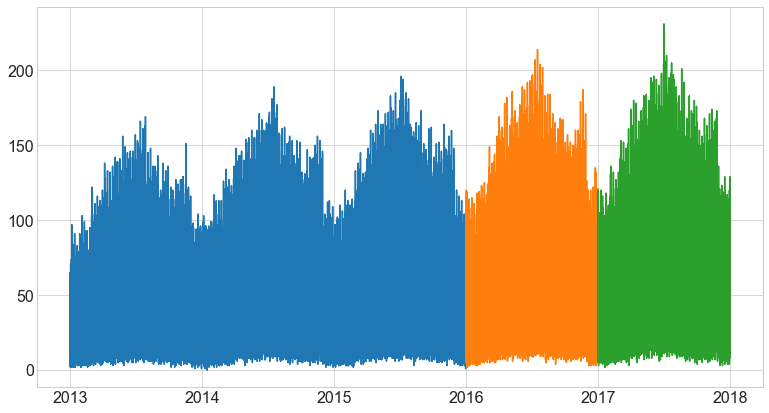

In [38]:
plt.plot(train.index, train.sale_amount)
plt.plot(validate.index, validate.sale_amount)
plt.plot(test.index, test.sale_amount)

In [39]:
# store target var in y
y = train.sale_amount
y.head()


sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

### Visualizing the data

In [40]:
# distribution of target using a hist

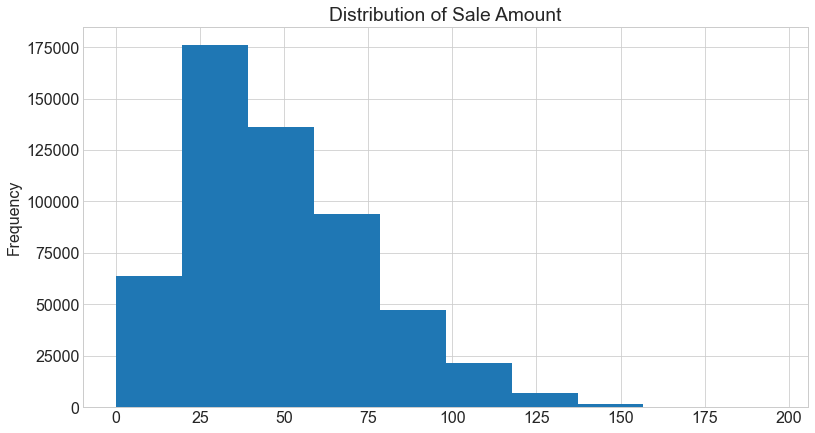

In [84]:
y.plot.hist(title='Distribution of Sale Amount');

#### Looking at the components of the date as they relate to the target var: 

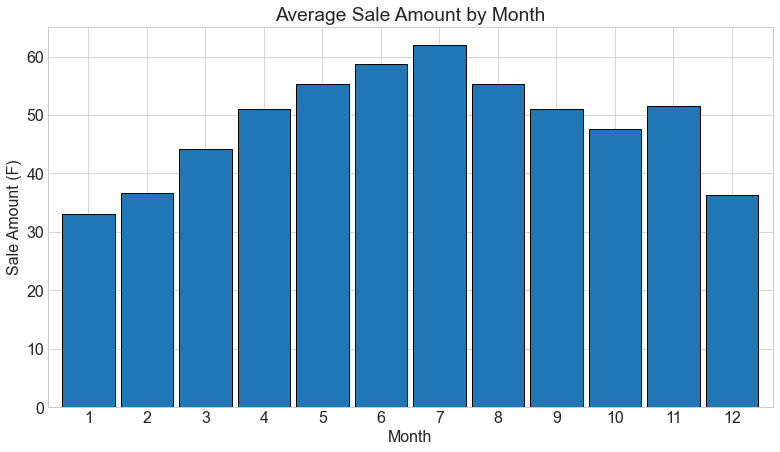

In [82]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sale Amount by Month', xlabel='Month', ylabel='Sale Amount (F)');

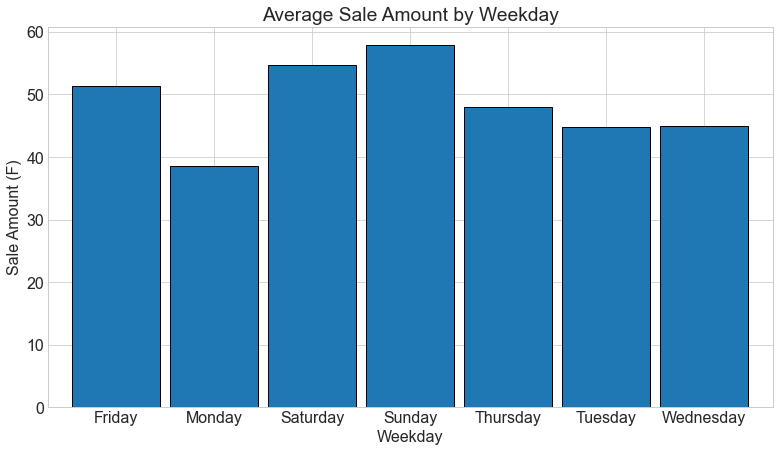

In [81]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sale Amount by Weekday', xlabel='Weekday', ylabel='Sale Amount (F)');

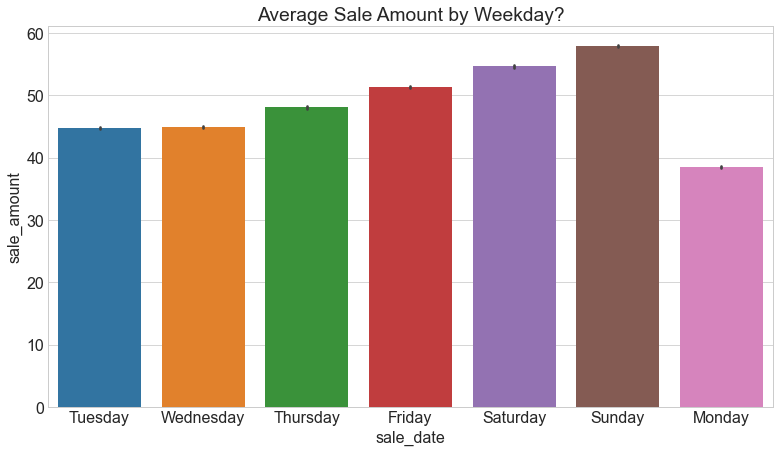

In [80]:
sns.barplot(data=train, y='sale_amount', x=y.index.day_name())
plt.title("Average Sale Amount by Weekday?")
plt.show()

#### Visualizing the target over time:

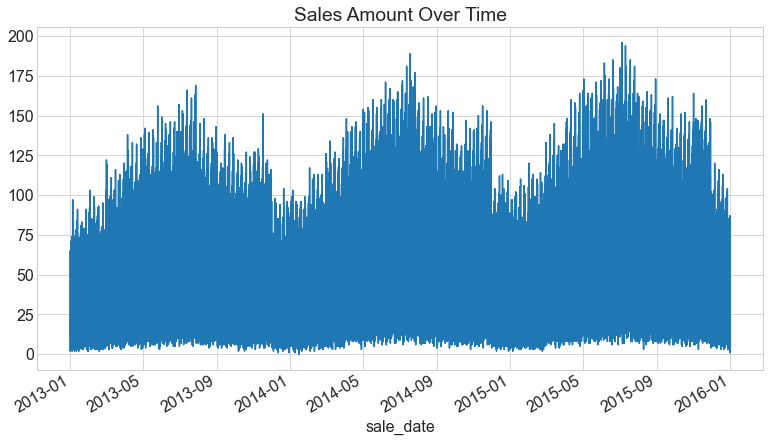

In [79]:
y.plot(title='Sales Amount Over Time');

#### Vizualizing the target over various time periods:

In [67]:
# resample data to viz over various time periods

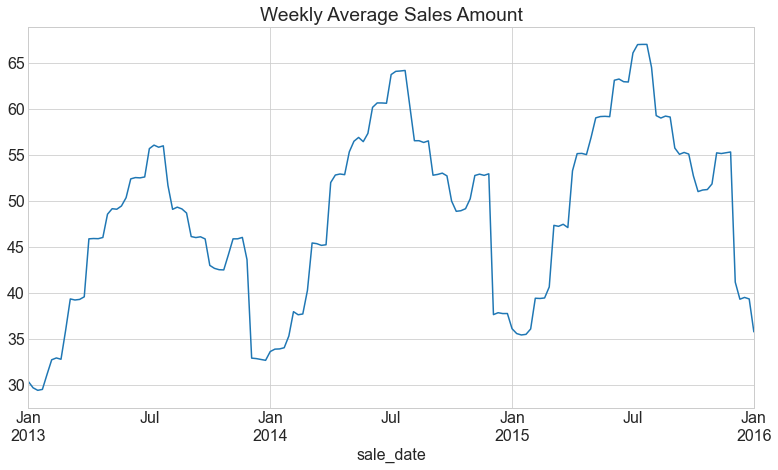

In [77]:
y.resample('1W').mean().plot(title='Weekly Average Sales Amount');

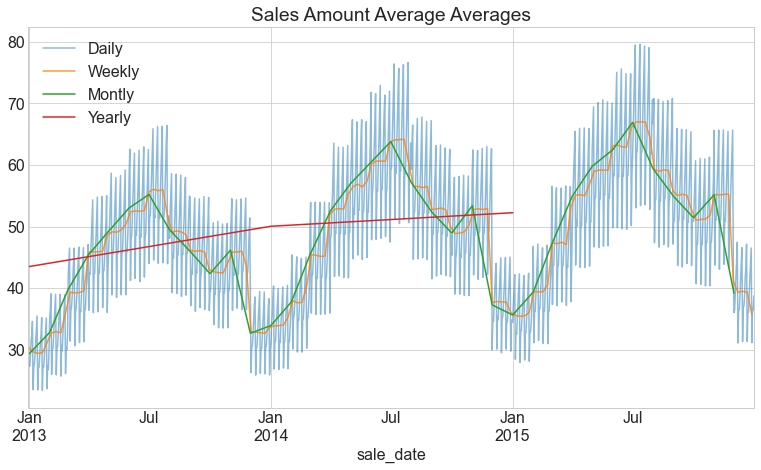

In [76]:
y.resample('D').mean().plot(alpha=.5, label='Daily', title='Sales Amount Average Averages')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()